# 01: PCOS Dataset Exploration

**Goal:** Load and inspect the PCOS prediction dataset to understand features, data quality, and key patterns.

**Dataset:** [Kaggle PCOS Prediction Dataset](https://www.kaggle.com/datasets/ankushpanday1/pcos-prediction-datasettop-75-countries)

**Next steps:**
- Feature correlation analysis
- Identify key predictive features
- Build baseline ML classifier

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [18]:
# Download from Kaggle directly
!pip install -q kaggle
from google.colab import files
files.upload()  # Upload kaggle.json

# or public link
df = pd.read_csv("https://raw.githubusercontent.com/candpixie/pcos-informatics/main/data/PCOS_infertility.csv")

print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Saving PCOS_infertility.csv to PCOS_infertility.csv
Dataset shape: (541, 6)
Number of samples: 541
Number of features: 6


In [19]:
# Preview the data
df.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
5,6,10006,0,237.97,1.99,6.74
6,7,10007,0,1.99,1.99,3.05
7,8,10008,0,100.51,100.51,1.54
8,9,10009,0,1.99,1.99,1
9,10,10010,0,1.99,1.99,1.61


In [20]:
# Check column names and data types
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)


Column names:
['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']

Data types:
Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
AMH(ng/mL)                 object
dtype: object


In [21]:
# Check for missing values
print("Missing values per column:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

Missing values per column:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


In [22]:
# Summary statistics
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,10271.000000,0.327172,664.549235,238.229518
std,156.317519,156.317519,0.469615,3348.920576,1603.826221
min,1.000000,10001.000000,0.000000,1.300000,0.110417
25%,136.000000,10136.000000,0.000000,1.990000,1.990000
50%,271.000000,10271.000000,0.000000,20.000000,1.990000
75%,406.000000,10406.000000,1.000000,297.210000,97.630000
max,541.000000,10541.000000,1.000000,32460.970000,25000.000000


## Target Variable Analysis

Target variable distribution:
PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

Class balance:
PCOS (Y/N)
0    0.672828
1    0.327172
Name: proportion, dtype: float64


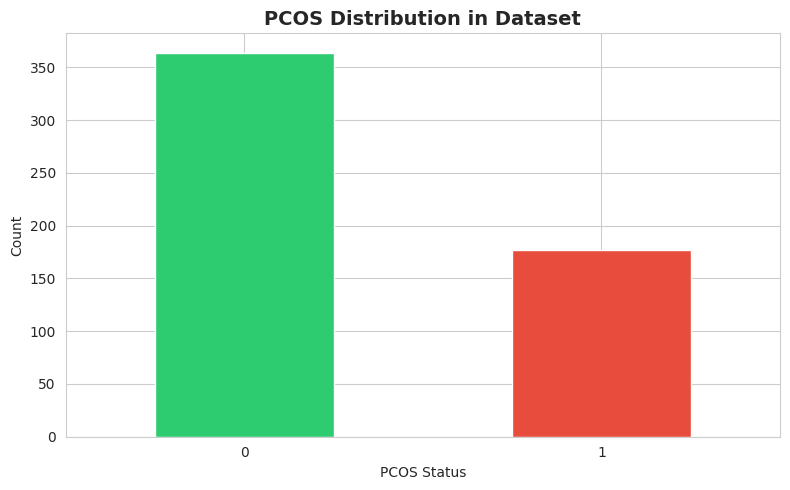

In [23]:
# Find the target column (usually named 'PCOS' or 'PCOS (Y/N)' or similar)
# Adjust column name based on your dataset
target_col = 'PCOS (Y/N)'  # Change this if needed

if target_col in df.columns:
    print(f"Target variable distribution:")
    print(df[target_col].value_counts())
    print(f"\nClass balance:")
    print(df[target_col].value_counts(normalize=True))

    # Visualize
    plt.figure(figsize=(8, 5))
    df[target_col].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
    plt.title('PCOS Distribution in Dataset', fontsize=14, fontweight='bold')
    plt.xlabel('PCOS Status')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{target_col}' not found. Available columns:")
    print(df.columns.tolist())

## Feature Distribution Analysis

In [24]:
# Select numerical columns for visualization
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical features ({len(numerical_cols)}): {numerical_cols}")

Numerical features (5): ['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)']


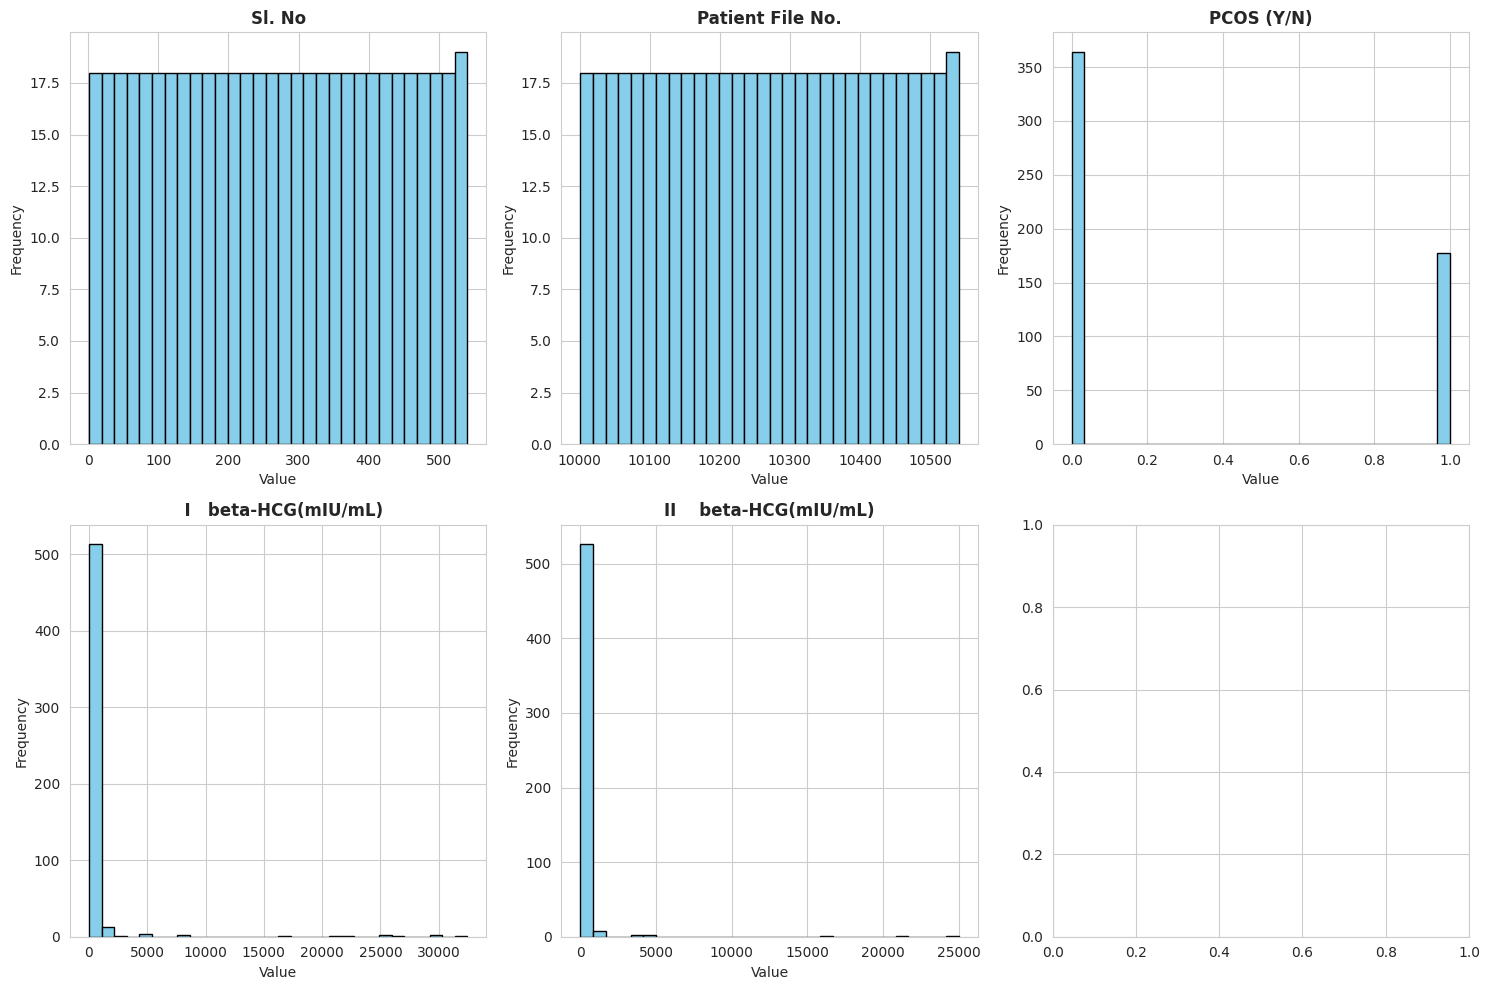

In [25]:
# Plot distributions of first few numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:6]):
    axes[idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(col, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Initial Observations

**Key findings:**
- Dataset contains X samples with Y features
- Target variable distribution: [fill in after running]
- Missing data: [note any patterns]
- Potential outliers: [note any unusual distributions]

**Next steps:**
1. Feature correlation analysis
2. Handle missing values
3. Feature engineering
4. Build baseline ML model